Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/ohoundeg/EMU/EMU_atr/emu_atrb_m_1_ssh_mask_compac_binary.bin_1



Reading /efs_ecco/ohoundeg/EMU/EMU_atr/emu_atrb_m_1_ssh_mask_compac_binary.bin_1

Reading Attribution Tool output ... 
*********************************************
Read OBJF and contributions to it from different controls
   atrb: temporal anomaly 
   atrb_mn: reference time-mean 
   fctrl: names of atrb/atrb_mn variables 
from file /efs_ecco/ohoundeg/EMU/EMU_atr/emu_atrb_m_1_ssh_mask_compac_binary.bin_1/output/atrb.out_312

*********************************************
Read variable 
   atrb_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/ohoundeg/EMU/EMU_atr/emu_atrb_m_1_ssh_mask_compac_binary.bin_1/output/atrb.step_312



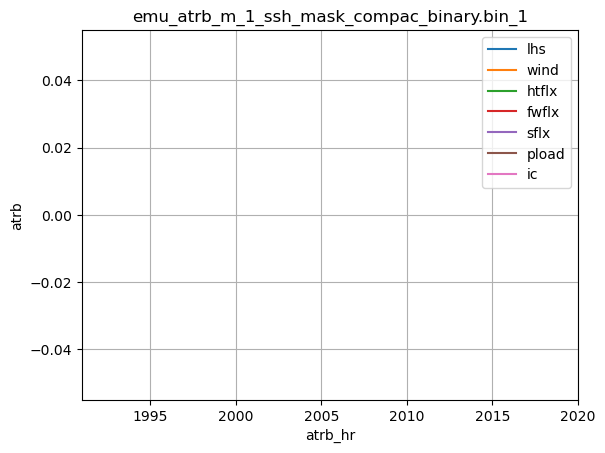


***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
atrb                atrb_ctrl           atrb_hr             atrb_mn             
cs                  drc                 drf                 dvol3d              
dxc                 dxg                 dyc                 dyg                 
hfacc               hfacs               hfacw               nr                  
nx                  ny                  rac                 ras                 
raw                 raz                 rc                  rf                  
sn                  xc                  xg                  yc                  
yg                  


In [4]:
import runpy
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');

In [5]:
import sys
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept
# import plt_atrb

In [6]:
# Attribution Toolç
globals_dict = ept.emu_plot(run_name="/efs_ecco/ohoundeg/EMU/EMU_atr02/emu_atrb_m_1_15_1077_1")

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs/owang/ECCO/EMU_test/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/ohoundeg/EMU/EMU_atr02/emu_atrb_m_1_15_1077_1

Reading /efs_ecco/ohoundeg/EMU/EMU_atr02/emu_atrb_m_1_15_1077_1

Reading Attribution Tool output ... 
*********************************************
Read OBJF and contributions to it from different controls
   atrb: temporal anomaly 
   atrb_mn: reference time-mean 
   fctrl: names of atrb/atrb_mn variables 
from file /efs_ecco/ohoundeg/EMU/EMU_atr02/emu_atrb_m_1_15_1077_1/output/atrb.out_312

*********************************************
Read variable 
   atrb_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/ohoundeg/EMU/EMU_atr02/emu_atrb_m_1_15_1077_1/output/atrb.step_312


***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
atrb                atrb_ctrl   

In [7]:
globals_dict.keys()

dict_keys(['return_vars', 'emu'])

In [8]:
# Extract return dictionary
return_vars_dict = globals_dict.get('return_vars')
return_vars_dict.keys()

dict_keys(['time_values', 'variable', 'ctrl_name', 'plot_title'])

In [11]:
## for plot
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import numpy as np
import os

In [12]:
# time 
time_atr = return_vars_dict['time_values']
time_atr.size

312

In [13]:
tfix = np.unique(time_atr.round())

In [14]:
vars_atr = return_vars_dict['variable']
vars_atr.shape

(7, 312)

In [15]:
vars_name = return_vars_dict['ctrl_name']

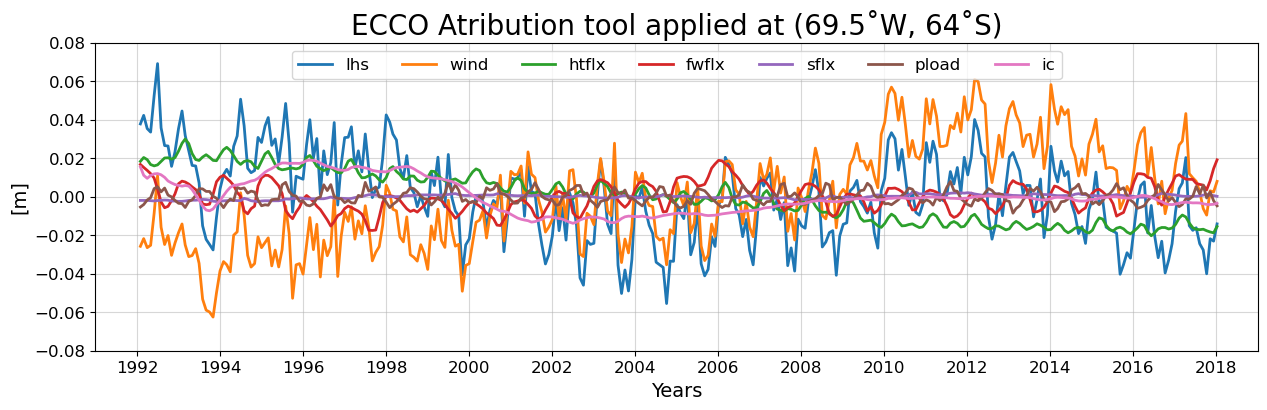

In [18]:
fig = plt.figure(figsize=[15, 4])
for i in np.arange(7):
    plt.plot(time_atr,vars_atr[i,:], label=vars_name[i],linewidth=2)
# plt.plot(time_atr,vars_atr[0,:]-vars_atr[1,:],'-k',label='residual')
plt.title("ECCO Atribution tool applied at (69.5˚W, 64˚S)",fontsize=20)
plt.legend(ncol=8,loc="upper center",fontsize=12)
plt.xticks(np.arange(tfix[0],tfix[-1]+2,2),fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.08,0.08);plt.xlim(1991,2019)
plt.xlabel("Years",fontsize=14);plt.ylabel("[m]",fontsize=14)
plt.grid(alpha=.5)
plt.savefig('/efs_ecco/ohoundeg/ojh_scripts/EH24-ESPRESSO/contributors/ohoundeg/Figs/Attr_tool_at_69.5W_64S.png')

########## /efs/owang/ECCO/EMU_test/emu_userinterface_dir/README_atrb

In [88]:
os.system('pwd')

/home/jovyan/efs_ecco/ohoundeg/ojh_scripts/EH24-ESPRESSO/contributors/ohoundeg


0

In [99]:
vars_name

['lhs', 'wind', 'htflx', 'fwflx', 'sflx', 'pload', 'ic']

In [101]:
var_expl  = 1 - ((np.var(vars_atr[0,:]-vars_atr[1,:]))/np.var(vars_atr[0,:]))
var_expl

-0.8256820440292358

In [104]:
np.var(vars_atr[0,:]-vars_atr[1,:])

0.00089781906

In [106]:
np.var(vars_atr[0,:])

0.00049177185